In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

In [2]:
original_train = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
original_test = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [3]:
data_train = original_train.copy()
data_test = original_test.copy()

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [5]:
data_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [6]:
data_test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [7]:
pd.set_option('display.max_columns', None)
data_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


It's evident that all columns are categorical variables.

Let's check if there are any null values .

In [8]:
data_train.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [9]:
data_train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,4.945239e+00,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,2.078141e+00,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


Except of ID( which is anyways irrelevant, as we'll have index), all have understandable min and max values.

Let's see which features (columns) are in correlated with Y variable, i.e. FloodProbability

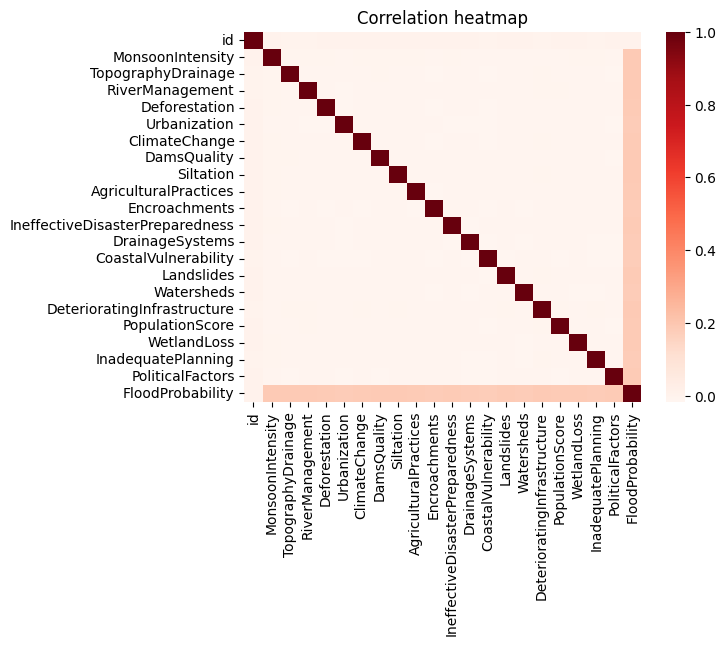

In [10]:
sns.heatmap(data_train.corr(method='pearson'),  cmap="Reds")
plt.title('Correlation heatmap')
plt.show()

Good news : Features are not correlated with each other. Hence, no multicollinearity.
Less good news : Features are not highly correlated with depedent variable , but moderately correlated.

Let's invetigate this further.

In [11]:
data_train.corr("pearson")

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,1.000000,-0.000093,-0.001518,-0.000413,-0.000080,0.000580,-0.000188,0.000133,0.000281,-0.000103,-0.000147,-0.000208,0.000558,-0.001386,0.001078,0.000215,-0.000385,0.000625,0.000931,-0.001535,-0.000155,-0.000184
MonsoonIntensity,-0.000093,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,-0.010309,-0.008032,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.001518,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,-0.012887,-0.010746,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.000413,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,-0.011615,-0.010675,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.000080,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,-0.013175,-0.009512,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,0.000580,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,-0.010784,-0.012685,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.000188,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,-0.012533,-0.011346,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,0.000133,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,-0.010890,-0.009515,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,0.000281,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,-0.010628,-0.009099,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.000103,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,-0.012244,-0.010763,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366


In [12]:
df = data_train.drop(['FloodProbability','id'], axis=1)

<Axes: >

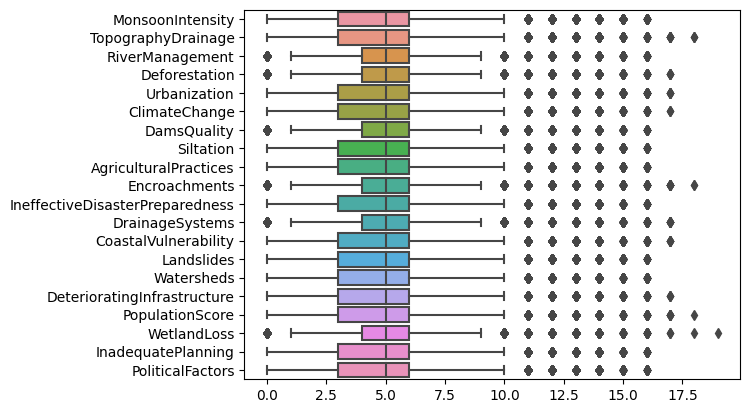

In [13]:
sns.boxplot(df,  orient="h")

We can see , each feature has outlier, we will remove these outliers.
As all the features have outliers, hence, we'll use the factor of 5 to impute the outliers

In [14]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,4.945239e+00,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,2.078141e+00,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01


In [15]:
count = df['MonsoonIntensity'][df['MonsoonIntensity']>10].count()
count

9244

So, roughly there are 9244 rows with outliers in MonsoonIntensity column out of total record of 1117957, which makes 0.8% . Thus we'll impute max values to these outliers.

In [16]:
def outlier_imputer(column_list, iqr_factor):
    for col in column_list:
        # for values less than equal to 0 , impute 0
        df.loc[df[col]<=0 , col]=0
        Q3 = df[col].quantile(0.75)
        Q1 = df[col].quantile(0.25)
        IQR = Q3 - Q1
        max = Q3 + (iqr_factor *IQR)
        print("Column name =",col)
        print("IQR factor = ",iqr_factor)
        print(" IQR = ",IQR)
        print("Q3 = ",Q3)
        print("Q1 = ",Q1)
        print("max threshold value = ",max)
        # for values >= max, impute max
        df.loc[df[col] >= max, col] = max
        

In [17]:
column_list = df.columns
column_list

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [18]:
outlier_imputer(column_list, 1.5)

Column name = MonsoonIntensity
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5
Column name = TopographyDrainage
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5
Column name = RiverManagement
IQR factor =  1.5
 IQR =  2.0
Q3 =  6.0
Q1 =  4.0
max threshold value =  9.0
Column name = Deforestation
IQR factor =  1.5
 IQR =  2.0
Q3 =  6.0
Q1 =  4.0
max threshold value =  9.0
Column name = Urbanization
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5


/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] >= max, col] = max
/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] >= max, col] = max
/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] >= max, col] = max


Column name = ClimateChange
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5
Column name = DamsQuality
IQR factor =  1.5
 IQR =  2.0
Q3 =  6.0
Q1 =  4.0
max threshold value =  9.0
Column name = Siltation
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5
Column name = AgriculturalPractices
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5
Column name = Encroachments
IQR factor =  1.5
 IQR =  2.0
Q3 =  6.0
Q1 =  4.0
max threshold value =  9.0


/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] >= max, col] = max
/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] >= max, col] = max
/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] >= max, col] = max


Column name = IneffectiveDisasterPreparedness
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5
Column name = DrainageSystems
IQR factor =  1.5
 IQR =  2.0
Q3 =  6.0
Q1 =  4.0
max threshold value =  9.0
Column name = CoastalVulnerability
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5
Column name = Landslides
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5
Column name = Watersheds
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5


/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] >= max, col] = max
/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] >= max, col] = max
/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] >= max, col] = max
/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an e

Column name = DeterioratingInfrastructure
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5
Column name = PopulationScore
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5
Column name = WetlandLoss
IQR factor =  1.5
 IQR =  2.0
Q3 =  6.0
Q1 =  4.0
max threshold value =  9.0
Column name = InadequatePlanning
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5
Column name = PoliticalFactors
IQR factor =  1.5
 IQR =  3.0
Q3 =  6.0
Q1 =  3.0
max threshold value =  10.5


/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] >= max, col] = max
/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] >= max, col] = max
/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] >= max, col] = max
/tmp/ipykernel_18/426928785.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an e

Let's confirm that outiers are imputed maximum value computed by out outlier_imputer function.

In [19]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.912326e+00,4.917627e+00,4.921086e+00,4.909243e+00,4.933488e+00,4.925838e+00,4.919385e+00,4.918955e+00,4.934394e+00,4.912879e+00,4.936707e+00,4.911310e+00,4.944499e+00,4.922955e+00,4.920012e+00,4.917529e+00,4.918610e+00,4.916319e+00,4.931633e+00,4.930142e+00
std,2.027023e+00,2.065541e+00,1.985655e+00,1.966894e+00,2.054942e+00,2.031558e+00,1.990871e+00,2.037906e+00,2.042728e+00,1.991531e+00,2.051304e+00,1.981491e+00,2.059323e+00,2.051825e+00,2.053977e+00,2.038299e+00,2.046045e+00,1.981078e+00,2.052915e+00,2.062831e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
max,1.050000e+01,1.050000e+01,9.000000e+00,9.000000e+00,1.050000e+01,1.050000e+01,9.000000e+00,1.050000e+01,1.050000e+01,9.000000e+00,1.050000e+01,9.000000e+00,1.050000e+01,1.050000e+01,1.050000e+01,1.050000e+01,1.050000e+01,9.000000e+00,1.050000e+01,1.050000e+01


We can see max value is changed. Now, we can proceed with training our model.



In [20]:
data_train['FloodProbability'].describe()

count    1.117957e+06
mean     5.044803e-01
std      5.102610e-02
min      2.850000e-01
25%      4.700000e-01
50%      5.050000e-01
75%      5.400000e-01
max      7.250000e-01
Name: FloodProbability, dtype: float64

In [21]:
data_train_X = df.copy()
data_train_Y = data_train['FloodProbability'] 


Now, we can proceed with training our model.

We'll split our training and test data.

In [22]:
data_train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  float64
 1   TopographyDrainage               1117957 non-null  float64
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  float64
 5   ClimateChange                    1117957 non-null  float64
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  float64
 8   AgriculturalPractices            1117957 non-null  float64
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  float64
 11  DrainageSystems                  1117957 non-null 

In [23]:
data_train_Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1117957 entries, 0 to 1117956
Series name: FloodProbability
Non-Null Count    Dtype  
--------------    -----  
1117957 non-null  float64
dtypes: float64(1)
memory usage: 8.5 MB


In [24]:
X = data_train_X
Y = data_train_Y        
X_train , X_test, y_train, y_test =train_test_split(X , Y, test_size=0.2, random_state=111)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [26]:
X_train_scaled

array([[ 0.53693886,  1.49314445,  0.54377245, ..., -0.46312183,
         0.0336345 , -0.9355586 ],
       [-1.43670986, -0.9285089 ,  2.05468353, ..., -0.96793899,
         1.00803739, -0.45086672],
       [-1.43670986, -1.41283956,  1.04740948, ...,  2.06096398,
         0.0336345 ,  1.00320893],
       ...,
       [ 0.04352668,  0.52448311, -0.96713862, ...,  0.04169533,
        -1.42796982,  1.97259269],
       [ 0.53693886,  0.52448311,  0.54377245, ..., -0.96793899,
        -1.42796982,  0.51851705],
       [ 0.53693886,  1.97747512,  1.04740948, ...,  1.05132965,
        -0.45356694, -0.9355586 ]])

In [27]:
lr = LinearRegression().fit(X_train_scaled, y_train)

In [28]:
X_test_scaled = scaler.transform(X_test)


In [29]:
y_pred = lr.predict(X_test_scaled)

In [30]:
print("r2 sccore = ",r2_score(y_test, y_pred))

r2 sccore =  0.8378686318316487


In [31]:
data_test_scaled = scaler.transform(X_test)

In [32]:
y_test_pred = lr.predict(data_test_scaled)

In [33]:
data_test.set_index('id', inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745305 entries, 1117957 to 1863261
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   MonsoonIntensity                 745305 non-null  int64
 1   TopographyDrainage               745305 non-null  int64
 2   RiverManagement                  745305 non-null  int64
 3   Deforestation                    745305 non-null  int64
 4   Urbanization                     745305 non-null  int64
 5   ClimateChange                    745305 non-null  int64
 6   DamsQuality                      745305 non-null  int64
 7   Siltation                        745305 non-null  int64
 8   AgriculturalPractices            745305 non-null  int64
 9   Encroachments                    745305 non-null  int64
 10  IneffectiveDisasterPreparedness  745305 non-null  int64
 11  DrainageSystems                  745305 non-null  int64
 12  CoastalVulnerability        

In [34]:
data_test.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
id,,,,,,,,,,,,,,,,,,,,
1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [35]:
data_test2 = data_test
data_test2_scaled = scaler.transform(data_test2)
y_test2_pred = lr.predict(data_test2_scaled)

In [36]:
submission_file = pd.DataFrame({'id':data_test.index,'FloodProbability':y_test2_pred})
submission_file

,id,FloodProbability
0,1117957,0.575867
1,1117958,0.456395
2,1117959,0.456657
3,1117960,0.467575
4,1117961,0.467153
...,...,...
745300,1863257,0.479061
745301,1863258,0.451385
745302,1863259,0.628514
745303,1863260,0.553530


In [37]:
submission_file.to_csv('/kaggle/working/submission.csv',index=False)

# This challenge helped gain plathora of knowledge on EDA and helped me gain my intuition on the subject.